___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
X_train[4].shape

(28, 28)

In [8]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 189, 206, 187,  32,   0,
          0,   0,  26, 217, 226, 196,  11,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 192, 227, 234, 243, 230,
        147, 239, 242, 234, 218, 209,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 173, 225, 215, 233, 254,
          0, 194, 240, 217, 221, 190,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 139, 229, 212, 226, 255,
          0, 162, 255, 213, 226, 200,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98, 232, 211, 215, 249,
         46, 162, 246, 214, 230, 186,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

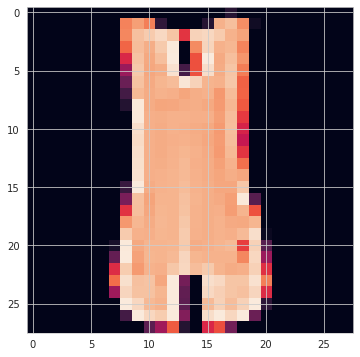

In [9]:
plt.imshow(X_train[4])
#plt.matshow(X_train[4])

In [10]:
y_train[4]

0

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
y_train.shape

(60000,)

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [14]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [15]:
classes[y_train[4]]

'T-shirt/top'

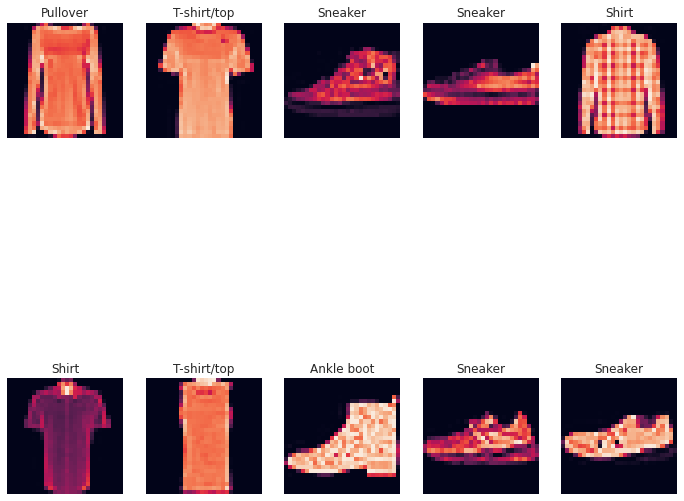

In [16]:
plt.figure(figsize=(12, 12))
for i in range(10):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(2, 5, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
X_train[5].min()

0

In [18]:
X_train[5].max()

255

In [19]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [20]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [21]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [22]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [26]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [27]:
y_train[0]

9

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [29]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [33]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 18s 4ms/step - loss: 0.3909 - accuracy: 0.8603 - val_loss: 0.3034 - val_accuracy: 0.8901
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2663 - accuracy: 0.9032 - val_loss: 0.2765 - val_accuracy: 0.8976
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2193 - accuracy: 0.9190 - val_loss: 0.2464 - val_accuracy: 0.9117
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1836 - accuracy: 0.9330 - val_loss: 0.2511 - val_accuracy: 0.9072
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1563 - accuracy: 0.9413 - val_loss: 0.2502 - val_accuracy: 0.9107


In [34]:
model.metrics_names

['loss', 'accuracy']

**TASK 7: Plot values of metrics you used in your model.**

In [35]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.391,0.860,0.303,0.890
1,0.266,0.903,0.277,0.898
2,0.219,0.919,0.246,0.912
3,0.184,0.933,0.251,0.907
4,0.156,0.941,0.250,0.911


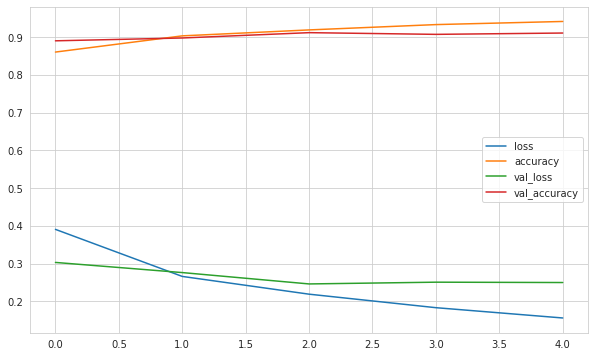

In [36]:
summary.plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2464 - accuracy: 0.9117


[0.24642011523246765, 0.9117000102996826]

In [39]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24642011523246765
Test accuracy: 0.9117000102996826


In [40]:
pred_prob = model.predict(X_test)

In [41]:
y_pred = np.argmax(pred_prob, axis=1)

In [42]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.88      0.85      1000
           3       0.90      0.91      0.91      1000
           4       0.87      0.86      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.73      0.75      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [44]:
print(confusion_matrix(y_test, y_pred))

[[865   0  17  20   1   1  91   0   5   0]
 [  2 982   1   8   3   0   4   0   0   0]
 [ 18   0 877  10  41   0  54   0   0   0]
 [ 17  10  14 910  18   0  27   0   4   0]
 [  0   1  72  28 861   0  38   0   0   0]
 [  0   0   0   0   0 979   0  11   1   9]
 [100   1  71  29  64   0 730   0   5   0]
 [  0   0   0   0   0   8   0 974   1  17]
 [  2   1   3   1   4   1   5   2 981   0]
 [  0   0   0   0   0   7   1  34   0 958]]


## Prediction

In [55]:
x_train = X_train.reshape(X_train.shape[0],28, 28) 
x_test = X_test.reshape(X_test.shape[0], 28, 28)

In [56]:
my_image = x_test[25]

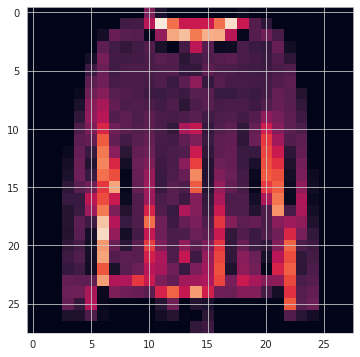

In [57]:
plt.imshow(my_image)

In [58]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

In [59]:
image_prediction

array([[3.6212197e-03, 4.5887700e-05, 7.9569083e-01, 1.1037783e-04,
        9.5427886e-02, 8.8373542e-07, 1.0508866e-01, 1.2090051e-08,
        1.3723720e-05, 4.0520010e-07]], dtype=float32)

In [60]:
np.argmax(image_prediction, axis=1)

array([2])

In [61]:
result=np.argmax(image_prediction, axis=1)

In [62]:
classes[int(result)]

'Pullover'

In [63]:
model.save("cnn-ass-2.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___